In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import os
os.getcwd()
# enregistrer le chemin du fichier dans la variable pour un accès plus facile
file_path = 'C:/Users/ngnat/OneDrive/Bureau/STAGE/2024-07-12_filteredData_DRC_Opendata_IPIS.csv'

# lire les données et stocker les données dans DataFrame intitulé melbourne_data
data = pd.read_csv(file_path)


# extracter les 1000 premières lignes
data.head(1000)


# Mesurer les caractéristiques statistiques de la base de données et  imprimer un résumé des données dans les données de Melbourne

data.describe()

#data.columns

,Unnamed: 0,workers_numb
count,2876.000000,2810.000000
mean,1438.500000,139.467616
std,830.374012,339.857809
min,1.000000,0.000000
25%,719.750000,25.000000
50%,1438.500000,60.000000
75%,2157.250000,122.000000
max,2876.000000,6200.000000


In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import os
os.getcwd()
file_path = 'C:/Users/ngnat/OneDrive/Bureau/STAGE/2024-07-12_filteredData_DRC_Opendata_IPIS.csv'
data = pd.read_csv(file_path)
#risk_features = data[['province', 'visit_date']]
#data.head(1000)
#data.describe()


In [3]:
shape = data.shape
print(shape)
types = data.dtypes
print(types)

(2876, 28)
Unnamed: 0                  int64
pcode                      object
name                       object
visit_date                 object
province                   object
workers_numb              float64
access_dry                 object
access_wet                 object
mineral1                   object
mineral2                   object
mineral3                   object
mercury                    object
interference               object
armed_group1               object
frequency_armed_group1     object
armed_group2               object
frequency_armed_group2     object
armed_group3               object
frequency_armed_group3     object
state_service1             object
state_service2             object
state_service3             object
state_service4             object
traceability               object
qualification              object
childunder15               object
childunder15work           object
project                    object
dtype: object


valeurs_manquantes = data.isnull()
nombre_de_valeurs_manquantes = valeurs_manquantes.sum()
print(nombre_de_valeurs_manquantes)

In [5]:
#data.dropna(axis=0,inplace=True)
# axis=0 ie qu'on supprime les colonnes et lignes si axis=1
#shape = data.shape
#print(shape)

In [6]:
nbre_valeurmanquante=data.isnull().sum()
print(nbre_valeurmanquante)

Unnamed: 0                   0
pcode                        0
name                         0
visit_date                   0
province                     0
workers_numb                66
access_dry                   0
access_wet                   0
mineral1                     0
mineral2                  2613
mineral3                  2854
mercury                      0
interference                 0
armed_group1              1536
frequency_armed_group1    1665
armed_group2              2493
frequency_armed_group2    2509
armed_group3              2838
frequency_armed_group3    2831
state_service1            1531
state_service2            1781
state_service3            2330
state_service4            2556
traceability                 0
qualification             2396
childunder15                 0
childunder15work          2463
project                      0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Boucle sur chaque colonne
for col in data.columns:
    # Vérifier si la colonne contient des valeurs non numériques
    if data[col].dtype == 'object':
        # Créer un encodeur pour la colonne actuelle
        encoder = LabelEncoder()
        # Appliquer l'encodage aux valeurs non manquantes
        data[col] = data[col].fillna('') 
        # Remplacer les valeurs manquantes par une catégorie 'manquante'
        data[col] = encoder.fit_transform(data[col])

# Afficher les données encodées
data.head()

,Unnamed: 0,pcode,name,visit_date,province,workers_numb,access_dry,access_wet,mineral1,mineral2,...,frequency_armed_group3,state_service1,state_service2,state_service3,state_service4,traceability,qualification,childunder15,childunder15work,project
0,1,0,1760,17,3,150.0,3,3,8,0,...,0,0,0,0,0,2,0,0,0,11
1,2,1,1511,17,3,115.0,3,3,8,0,...,0,0,0,0,0,2,0,0,0,11
2,3,2,1895,17,3,130.0,3,3,8,0,...,0,0,0,0,0,2,0,0,0,11
3,4,3,578,17,3,135.0,3,3,8,0,...,0,0,0,0,0,2,0,0,0,11
4,5,4,98,17,3,270.0,3,3,8,0,...,0,0,0,0,0,2,0,0,0,11


In [8]:
 #remplacement des données manquantes par la moyenne

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy ='mean')

#appliquons l'imputation aux données en utilisant la méthode fit_transform
data_imputed = imputer.fit_transform(data)

# appliquons le SimpleImputer aux données et convertir le tableau numpy en DataFrame
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

#Afficher les premières Lignes du DataFrame après imputation
print(data_imputed.head())

   Unnamed: 0  pcode    name  visit_date  province  workers_numb  access_dry  \
0         1.0    0.0  1760.0        17.0       3.0         150.0         3.0   
1         2.0    1.0  1511.0        17.0       3.0         115.0         3.0   
2         3.0    2.0  1895.0        17.0       3.0         130.0         3.0   
3         4.0    3.0   578.0        17.0       3.0         135.0         3.0   
4         5.0    4.0    98.0        17.0       3.0         270.0         3.0   

   access_wet  mineral1  mineral2  ...  frequency_armed_group3  \
0         3.0       8.0       0.0  ...                     0.0   
1         3.0       8.0       0.0  ...                     0.0   
2         3.0       8.0       0.0  ...                     0.0   
3         3.0       8.0       0.0  ...                     0.0   
4         3.0       8.0       0.0  ...                     0.0   

   state_service1  state_service2  state_service3  state_service4  \
0             0.0             0.0             0.0    

In [9]:
# normalisation des donnée
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)
#pour normaliser on utilise la fonction StandardScaler()
  


StandardScaler()

## Nuage de point

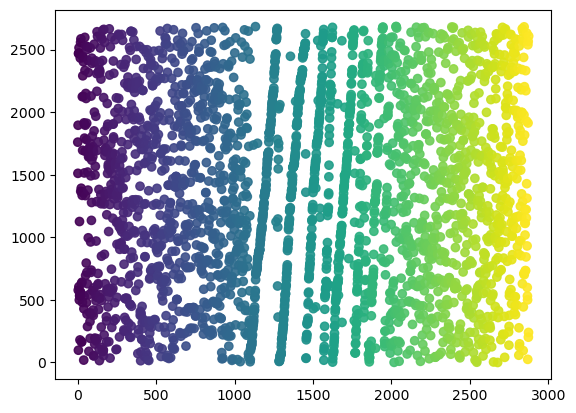

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
import matplotlib.pyplot as plt
x1 = data_imputed.iloc[: ,1:] #sélectionner tous les éléments sauf la première colonne
y1 = data_imputed.iloc[: ,0]  #sélectionner uniquement la première colonne

#convertir les données pandas en tableaux Numpy
x1_array = x1.values
y1_array = y1.values

#Tracer le nuage de points
plt.scatter(x1_array[:,0], x1_array[:,1], c=y1_array, alpha=0.9)
plt.show()
np.bincount(y1)

In [12]:
import pandas as pd

# Charger les données prétraitées
file_path = 'C:/Users/ngnat/OneDrive/Bureau/STAGE/preprocessed_data.csv'  
data = pd.read_csv(file_path)

# Vérifier les premières lignes du fichier
print(data.head())
# Identification des principales caractéristiques (exemple basé sur la connaissance du domaine)
# Sélection de colonnes pertinentes
key_features = ['workers_numb', 'armed_group1', 'province', 'mineral1', 'access_dry', 'traceability']

# Extraire les caractéristiques principales
data_key_features = data[key_features]
print(data_key_features.head())

   Unnamed: 0  pcode  name  visit_date  province  workers_numb  access_dry  \
0           1      0  1760          17         3         150.0           3   
1           2      1  1511          17         3         115.0           3   
2           3      2  1895          17         3         130.0           3   
3           4      3   578          17         3         135.0           3   
4           5      4    98          17         3         270.0           3   

   access_wet  mineral1  mineral2  ...  frequency_armed_group3  \
0           3         8         0  ...                       0   
1           3         8         0  ...                       0   
2           3         8         0  ...                       0   
3           3         8         0  ...                       0   
4           3         8         0  ...                       0   

   state_service1  state_service2  state_service3  state_service4  \
0               0               0               0               0

VISUALISATION ENSEMBLE D'ENTRAINEMENT ET ENSEMBLE DE TEST

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Sélectionner les caractéristiques (toutes les colonnes sauf la première) et la cible (la première colonne)
x1 = data_imputed.iloc[:, 1:]  # Caractéristiques
y1 = data_imputed.iloc[:, 0]   # Cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)



print(X_train.shape)  # Devrait montrer une taille non vide, par exemple (80, 4) pour un jeu de 100 échantillons
print(y_train.shape)  # Assure-toi que cela correspond au nombre d'échantillons de X_train

import pandas as pd

data = pd.read_csv('C:/Users/ngnat/OneDrive/Bureau/STAGE/2024-07-12_filteredData_DRC_Opendata_IPIS.csv')
print(data.shape)  # Vérifie que tu as bien des lignes et des colonnes

print(X_train.isnull().sum()) 

(2300, 27)
(2300,)
(2876, 28)
pcode                     0
name                      0
visit_date                0
province                  0
workers_numb              0
access_dry                0
access_wet                0
mineral1                  0
mineral2                  0
mineral3                  0
mercury                   0
interference              0
armed_group1              0
frequency_armed_group1    0
armed_group2              0
frequency_armed_group2    0
armed_group3              0
frequency_armed_group3    0
state_service1            0
state_service2            0
state_service3            0
state_service4            0
traceability              0
qualification             0
childunder15              0
childunder15work          0
project                   0
dtype: int64


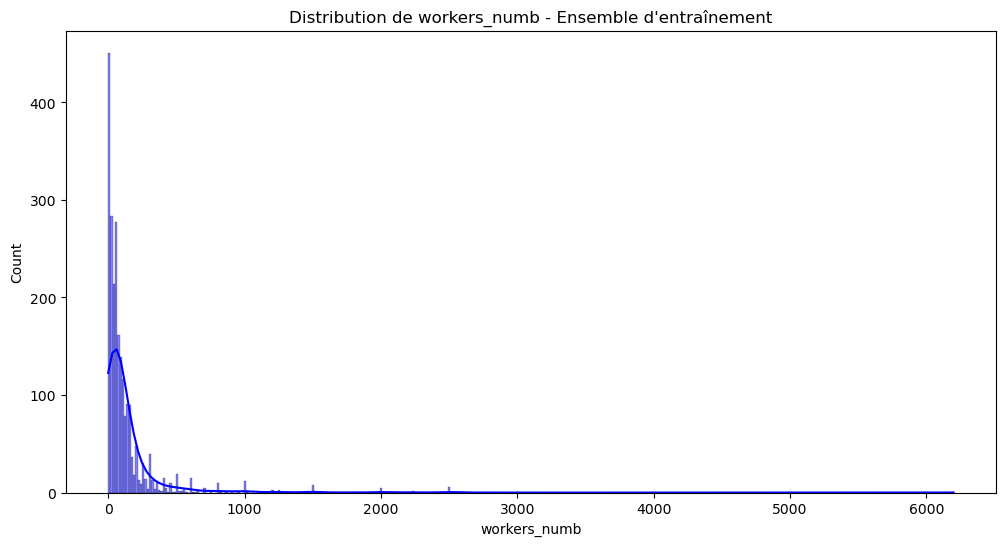

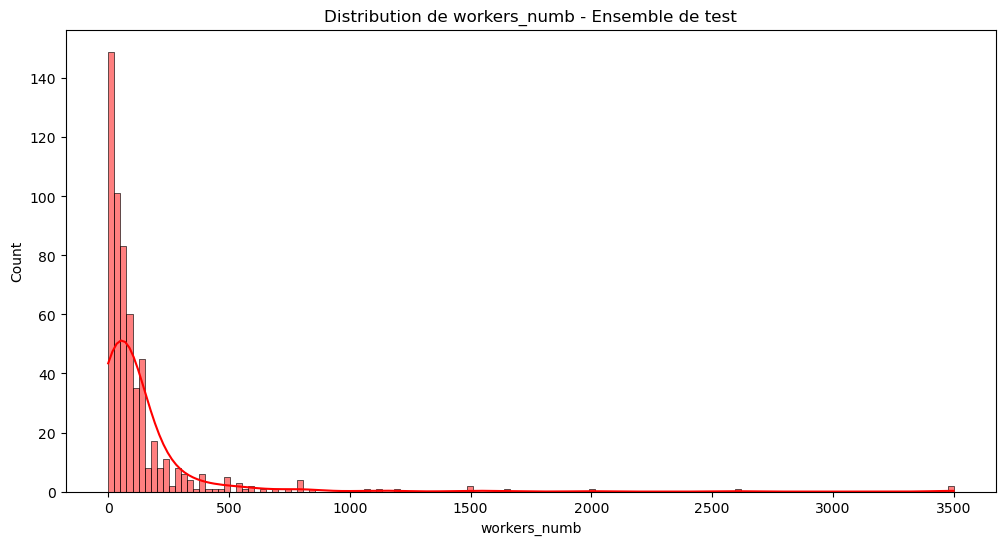

In [15]:
import seaborn as sns
# sns est utilisé pour créer des visualisations plus élégantes et faciliter l'exploration visuelle des données
import matplotlib.pyplot as plt

# Histogramme pour l'ensemble d'entraînement
plt.figure(figsize=(12, 6))
sns.histplot(X_train['workers_numb'], color='blue', kde=True)
plt.title('Distribution de workers_numb - Ensemble d\'entraînement')
plt.show()

# Histogramme pour l'ensemble de test
plt.figure(figsize=(12, 6))
sns.histplot(X_test['workers_numb'], color='red', kde=True)
plt.title('Distribution de workers_numb - Ensemble de test')
plt.show()

In [16]:
data.to_csv('C:/Users/ngnat/OneDrive/Bureau/STAGE/preprocessed_data.csv', index=False)
print("Les données prétraitées ont été enregistrées.")

Les données prétraitées ont été enregistrées.


In [18]:
# Exemple fictif : Ajout de données sur la population par province
province_population = {
    'Province1': 3000000,
    'Province2': 2000000,
    'Province3': 1500000,
    # Ajoutez les autres provinces et leur population 
}

# Créer une nouvelle colonne 'population' en fonction de la province
data['province_population'] = data['province'].map(province_population) 
# Calcul du ratio de productivité par travailleur
data['productivity_per_worker'] = data['workers_numb']
#data['productivity_per_worker'] = data['mineral1'] / data['workers_numb']
from sklearn.preprocessing import MinMaxScaler

# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les colonnes pertinentes
data[['mineral1', 'workers_numb']] = scaler.fit_transform(data[['mineral1', 'workers_numb']])

ValueError: could not convert string to float: 'Or'

Division des Données en Ensembles d’Entraînement et de test

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Simulation des données (à remplacer par les vraies données)
# X = data[['mineral1', 'workers_numb', 'productivity_per_worker', 'province_population']]
# y = data['province']  # Remplacer par la variable cible

# Exemple de simulation des données pour éviter les erreurs pendant les tests
X = np.random.rand(100, 4)  # Remplace cette ligne par les vraies données
y = np.random.randint(0, 3, 100)  # 3 classes pour simuler un problème multiclass

# Division des données : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remplacement des valeurs infinies par NaN dans X_train
X_train[np.isinf(X_train)] = np.nan

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression avec gestion des classes déséquilibrées
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluation des métriques avec `zero_division`
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_logreg, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')

# Affichage des résultats
print(f"Régression Logistique - Exactitude: {accuracy}, Précision: {precision}, Rappel: {recall}, F1: {f1}, ROC-AUC: {roc_auc}")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
print("Matrice de confusion pour la régression logistique :\n", cm)

# Decision Tree Classifier avec gestion des classes déséquilibrées
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_tree = tree.predict(X_test)

# Évaluation des métriques pour l'arbre de décision
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted', zero_division=1)
recall_tree = recall_score(y_test, y_pred_tree, average='weighted', zero_division=1)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted', zero_division=1)
roc_auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test), multi_class='ovr')

# Affichage des résultats
print(f"Arbre de Décision - Exactitude: {accuracy_tree}, Précision: {precision_tree}, Rappel: {recall_tree}, F1: {f1_tree}, ROC-AUC: {roc_auc_tree}")

# Afficher la matrice de confusion pour l'arbre de décision
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de confusion pour l'arbre de décision :\n", cm_tree)

# Vérifier la distribution des classes dans y_test et y_pred_logreg
print("Distribution des classes dans y_test :", np.bincount(y_test))
print("Distribution des classes dans y_pred_logreg :", np.bincount(y_pred_logreg))



In [ ]:
# Création d'un dictionnaire pour stocker les résultats de chaque modèle
model_results = {}

# Stocker les résultats de la régression logistique
model_results['Logistic Regression'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}

# Stocker les résultats de l'arbre de décision
model_results['Decision Tree'] = {
    'accuracy': accuracy_tree,
    'precision': precision_tree,
    'recall': recall_tree,
    'f1': f1_tree,
    'roc_auc': roc_auc_tree
}

# Comparaison des résultats
print("Comparaison des modèles :")
for model, metrics in model_results.items():
    print(f"\nModèle : {model}")
    for metric_name, value in metrics.items():
        print(f"{metric_name.capitalize()} : {value:.4f}")

# Comparer les modèles selon une métrique spécifique, par exemple, 'f1'
best_model = max(model_results, key=lambda model: model_results[model]['f1'])

print(f"\nLe modèle avec le meilleur score F1 est : {best_model} avec un score de {model_results[best_model]['f1']:.4f}")
